<img src="HFPS.png" alt="LOGO" style="height: 250px; width:800px;"/>

## Team Members:
- Yashowardhan Shinde
- Aryan Kenchappagol
- Sumit Patil
- Yash Panchwatkar

## Problem Statement:
**Heart Failure Prediction using Machine Learning model during the follow up period of a patient when he/she has been diagnosed with a Heart Condition.**

**We intend to develop a robust hybrid prediction model for detecting a heart failure in a patient during the follow up period of the patient so that the they can be more aware of their heart conditions and can take the necessary actions according to their heart condition.**

## Importing all the necessary libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
%matplotlib inline

ModuleNotFoundError: No module named 'plotly'

## Loading the dataset:

In [2]:
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


## Data Description:
1. **Age**: age of patient (in years)

2. **Anaemia**: Decrease of red blood cells or hemoglobin

3. **High blood pressure**: If a patient has hypertension

4. **Creatinine phosphokinase**: Level of the CPK enzyme in the blood (mcg/L)

5. **Diabetes**: If the patient has diabetes

6. **Ejection fraction**: Percentage of blood leaving the heart at each contraction

7. **Sex**: Woman or man

8. **Platelets**: Platelets in the blood (kiloplatelets/mL)

9. **Serum creatinine**: Level of creatinine in the blood (mg/dL)

10. **Serum sodium**: Level of sodium in the blood (mEq/L)

11. **Smoking**: If the patient smokes

12. **Time**: Follow-up period (in days)

13. **(Target) Death Event**: If the patient died during the follow-up period

## Performing EDA Exploratory Data Anlysis

In [3]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [4]:
df.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [5]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

## Visualization for exploring data:
- Pairplot
- Histograms for data distribution
- Box Plots 
- Bar Charts
- Scatter Plots
- Correlation Graph (Heatmap)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


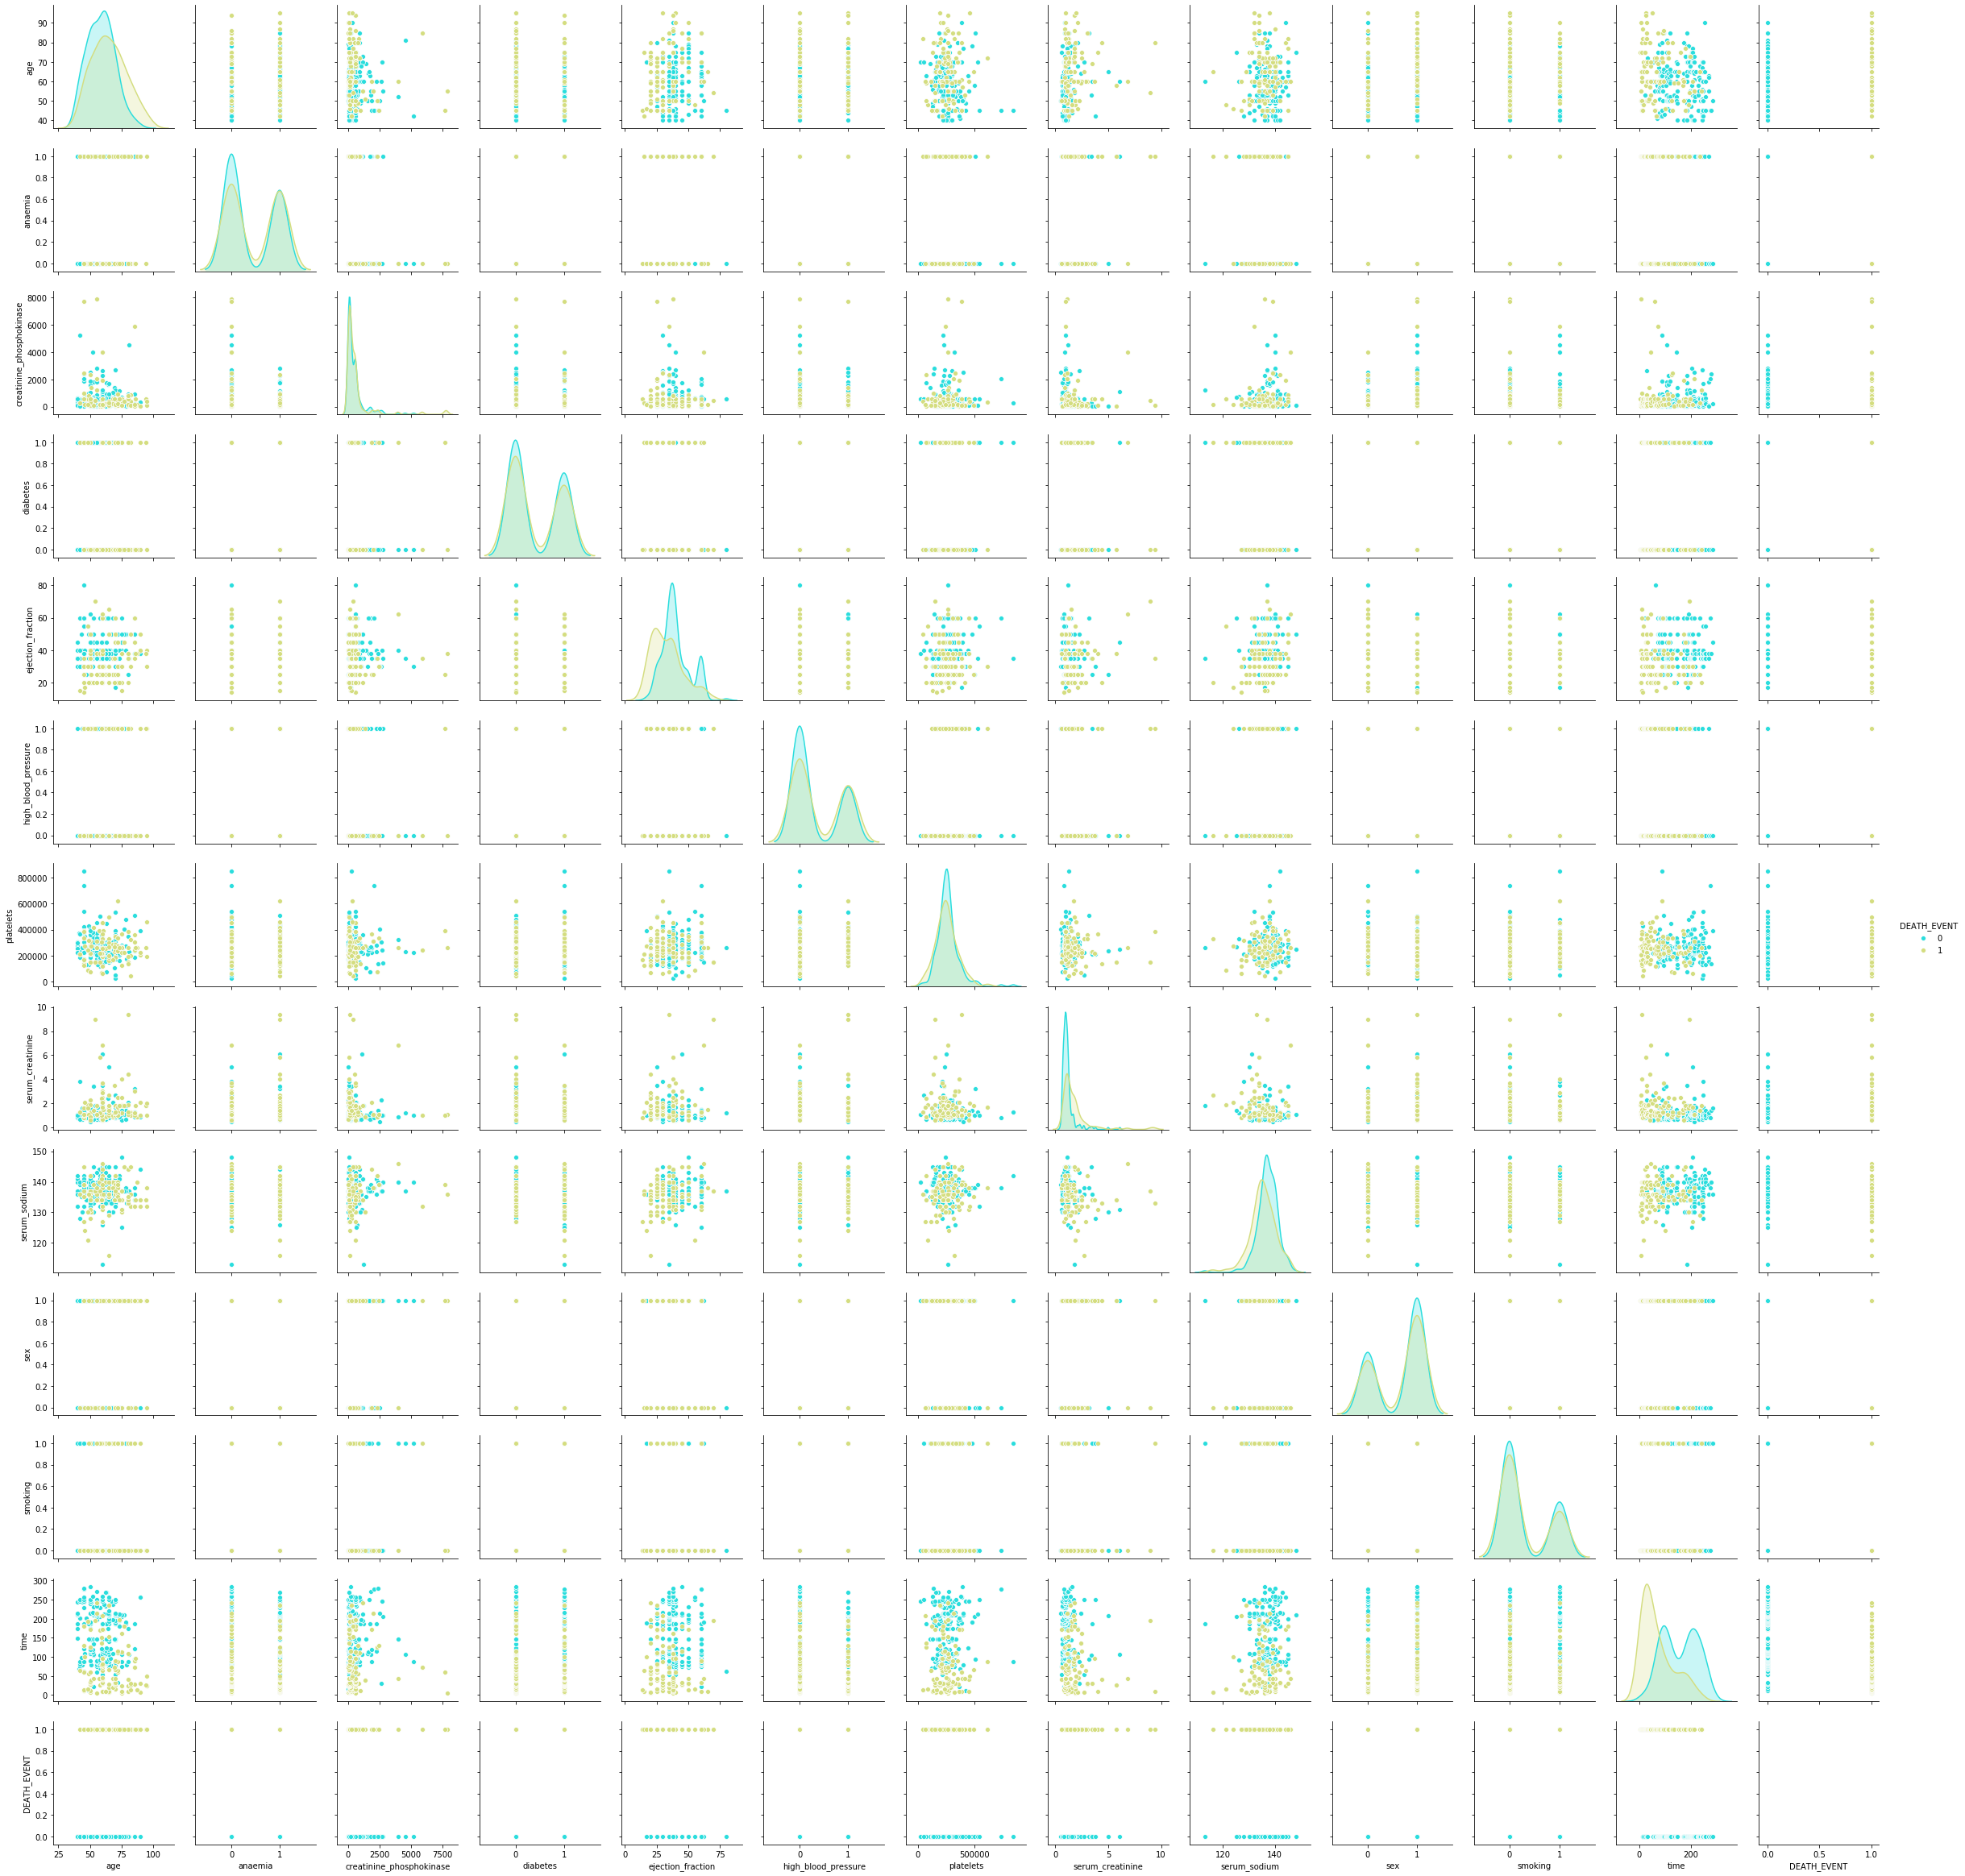

In [6]:
sns.pairplot(df, hue = 'DEATH_EVENT', palette='rainbow')
plt.show()

In [7]:
numeric = ['age', 'creatinine_phosphokinase', 
           'ejection_fraction', 'platelets', 
           'serum_creatinine', 'time', 'serum_sodium']

## Gender Analysis:
Now we will see the relation between the gender of the patients and the values other attributes like Age, Platelets, Ceratinine Phosphokinase etc.

In [8]:
fig = make_subplots(rows=2, cols=3, start_cell="top-left", subplot_titles=("Age","Creatinine Phosphokinase", "Platelets","Serum Creatinine","Serum Sodium","Time", "Diabetes"))
fig.add_trace(go.Box(y=df['age'], x=df['sex'],boxpoints='all', name='Age'), row=1, col=1)
fig.add_trace(go.Box(y=df['creatinine_phosphokinase'], x=df['sex'],boxpoints='all', name='Creatinine Phosphokinase'), row=1, col=2)
fig.add_trace(go.Box(y=df['platelets'], x=df['sex'],boxpoints='all', name='Platelets'), row=1, col=3)
fig.add_trace(go.Box(y=df['serum_creatinine'], x=df['sex'],boxpoints='all', name='Serum Creatinine'), row=2, col=1)
fig.add_trace(go.Box(y=df['serum_sodium'], x=df['sex'], boxpoints='all',name='Serum Sodium'), row=2, col=2)
fig.add_trace(go.Box(y=df['time'], x=df['sex'], boxpoints='all', name='Time'), row=2, col=3) 
fig.update_layout(height=1400, width=1000,showlegend=False)
fig.show()

NameError: name 'make_subplots' is not defined

**From the above graphs we can draw a few conclusions like:**
- The age of most females in our data lie between 50 and 67 whereas the age of most males lies between 52 and 70
- The majority of females have platelets in the range 223k and 318k (kiloplatelets/mL) whereas majority of males have pltelets in the range 211k and 295k(kiloplatelets/mL)
- The Sodium Serum levels in females is in the range 135 and 140 (mEq/L) whereas in males it is 134 and 139 (mEq/L) which isn't a huge difference.
- The serum ceratinine levels for both males and females also lie in a very similar range of about 0.9 and 1.4(mg/dL)
- The Ceratinine Phosphokinase levels of both males and females lie in the range 115 and 582 (mcg/L)
- In conclusion most of the attributes for both males and females is very similar.

## Smoking Analysis:
**Now we will try to explore the data about the smokers and the non smokers from the dataset**

In [10]:
smoking = len(df[df['smoking']==1])
non_smoking = len(df)-smoking

print(smoking, non_smoking)

smoking_males = df[df["smoking"] == 1]
smoking_males = len(smoking_males[smoking_males['sex']==1])

smoking_females = df[df["smoking"] == 1]
smoking_females = len(smoking_females[smoking_females['sex']==0])

print(smoking_males, smoking_females)


non_smoking_males = df[df['smoking']==0]
non_smoking_males = len(non_smoking_males[non_smoking_males['sex']==1])

non_smoking_females = df[df['smoking']==0]
non_smoking_females = len(non_smoking_females[non_smoking_females['sex']==0])

print(non_smoking_males, non_smoking_females)

96 203
92 4
102 101


[]

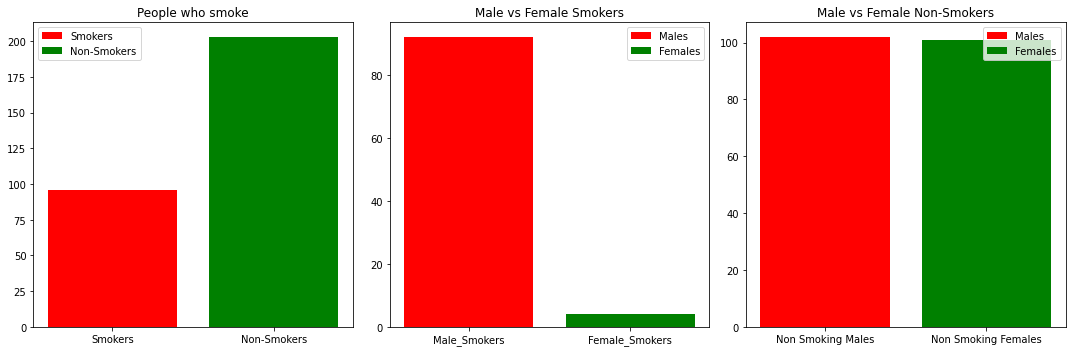

In [11]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.bar(x=["Smokers"], height = [smoking], label = 'Smokers', color = 'red')
plt.bar(x=["Non-Smokers"], height = [non_smoking], label = 'Non-Smokers', color = 'green')
plt.title("People who smoke")
plt.legend()
plt.tight_layout()
plt.plot()

plt.subplot(1,3,2)
plt.bar(x=["Male_Smokers"], height = [smoking_males], label = "Males", color = 'red')
plt.bar(x=["Female_Smokers"], height = [smoking_females], label = "Females", color = 'green')
plt.title("Male vs Female Smokers")
plt.legend()
plt.tight_layout()
plt.plot()

plt.subplot(1,3,3)
plt.bar(x=['Non Smoking Males'], height = [non_smoking_males], label = "Males", color = 'red')
plt.bar(x=["Non Smoking Females"], height = [non_smoking_females], label = "Females", color = 'green')
plt.title("Male vs Female Non-Smokers")
plt.legend()
plt.tight_layout()
plt.plot()

#### Graph 1:(Smokers vs Non-Smokers)
We can see that in our data set we have more non smokers than smokers. Now, let's explore some data on the smokers.
#### Graph 2: (Male vs Female) Smokers
In the second graph it is clearly visible that out data has very few female smokers and a lot of male smokers.
#### Graph 3: (Male vs Female) Non-Smokers
In the third graph it is seen that the number of male non-smokers and female non-smokers is quite similar.

**In conclusion we can say that the non-smokers are in majority with equal male and female distribution and the males dominate in the smoking zone with a few female smokers**

In [12]:
smokers_btwn_40_50 = df[df['smoking'] == 1]
smokers_btwn_40_50 = len(smokers_btwn_40_50[smokers_btwn_40_50['age']<50])
print(smokers_btwn_40_50)

smokers_btwn_50_60 = df[df['smoking'] == 1]
smokers_btwn_50_60 = smokers_btwn_50_60[50<=smokers_btwn_50_60['age']]
smokers_btwn_50_60 = len(smokers_btwn_50_60[smokers_btwn_50_60['age']<60])
print(smokers_btwn_50_60)

smokers_btwn_60_70 = df[df['smoking'] == 1]
smokers_btwn_60_70 = smokers_btwn_60_70[60<=smokers_btwn_60_70['age']]
smokers_btwn_60_70 = len(smokers_btwn_60_70[smokers_btwn_60_70['age']<70])
print(smokers_btwn_60_70)

smokers_above_70 = df[df['smoking'] == 1]
smokers_above_70 = len(smokers_above_70[70<=smokers_above_70['age']])
print(smokers_above_70)
len(df[df['smoking'] == 1])

11
29
29
27


96

[]

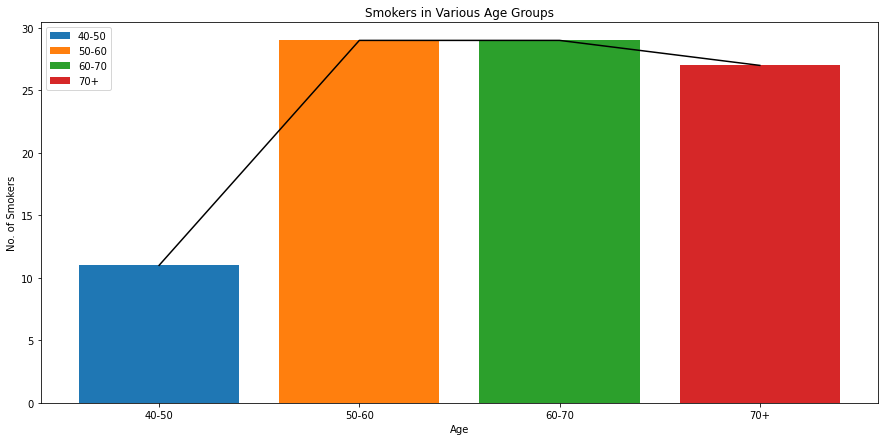

In [13]:
fig = plt.figure(figsize=(15,7))
plt.bar(x = ["40-50"], height = smokers_btwn_40_50, label = '40-50')
plt.bar(x = ["50-60"], height = smokers_btwn_50_60, label = '50-60')
plt.bar(x = ['60-70'], height = smokers_btwn_60_70, label = '60-70')
plt.bar(x = ['70+'], height =  smokers_above_70, label = '70+')
plt.title("Smokers in Various Age Groups")
plt.xlabel("Age")
plt.ylabel("No. of Smokers")
plt.legend()
plt.plot()

plt.plot([smokers_btwn_40_50, smokers_btwn_50_60, smokers_btwn_60_70, smokers_above_70], color = 'black')
plt.plot()

### The graph above depicts the distribution of smokers over different age groups:
**From the graph we can conclude that people with older age have a higher tendency of smoking and the people with age between age 40-50 have lower tendency of smoking.** 

### Ploting Histograms for Continuous Data:
**The ideal histogram should show a trend like a Bell Curve if any histogram has a positive or a negative skewed distribution we will try to fix that using some standard transformations.**

**Methods to fix skewness in data:**
- Right Skewed Data
    1. Square Root
    2. Cube Root
    3. Log
    4. Reciprocal
- Left Skewed Data
    1. Square
    2. Cube
    3. Higher Power

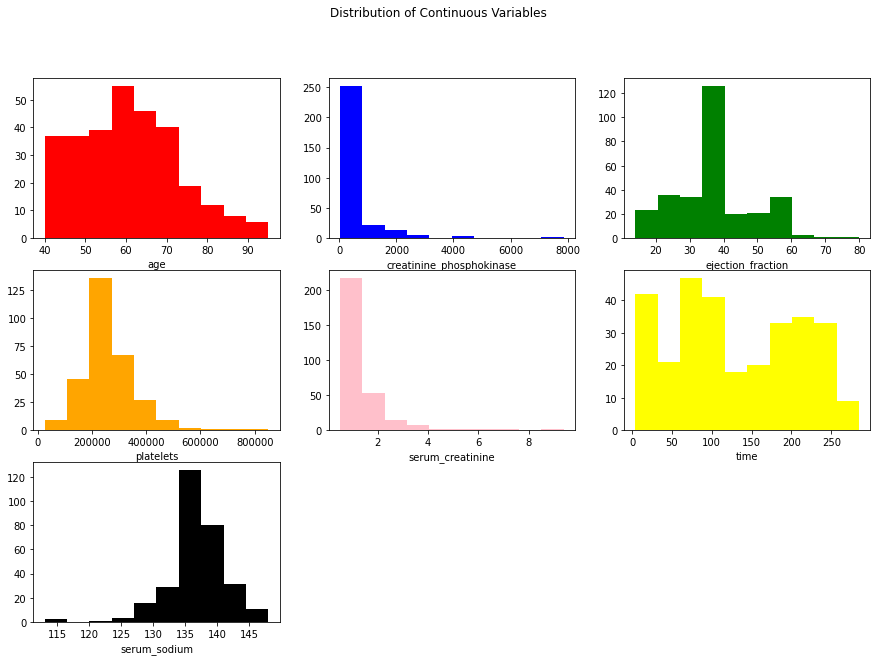

In [8]:
figure = plt.figure(figsize=(15, 10))
colors = ['red', 'blue', 'green', 'orange', 'pink', 'yellow', 'black']
plt.suptitle("Distribution of Continuous Variables")
for i in range(1, 8):
    plt.subplot(3,3,i)
    plt.hist(df[numeric[i-1]], color = colors[i-1])
    # plt.plot(df[numeric[i-1]])
    plt.xlabel(numeric[i-1])
    plt.plot()

**As we can see that the distribution of serum_creatinine and ceratinine_phosphokinase show Right Skweness so we will try to fix this using out standard transformations here wel will use Leo-Johnson transformation method** 

In [9]:
from sklearn.preprocessing import PowerTransformer

t = np.array(list(df['creatinine_phosphokinase'])).reshape(-1, 1)
pt = PowerTransformer(method = "yeo-johnson")
creatinine_phosphokinase = pt.fit_transform(t)
df['creatinine_phosphokinase'] = creatinine_phosphokinase

t = np.array(list(df['serum_creatinine'])).reshape(-1, 1)
pt = PowerTransformer(method = "yeo-johnson")
serum_creatinine = pt.fit_transform(t)
df['serum_creatinine'] = serum_creatinine

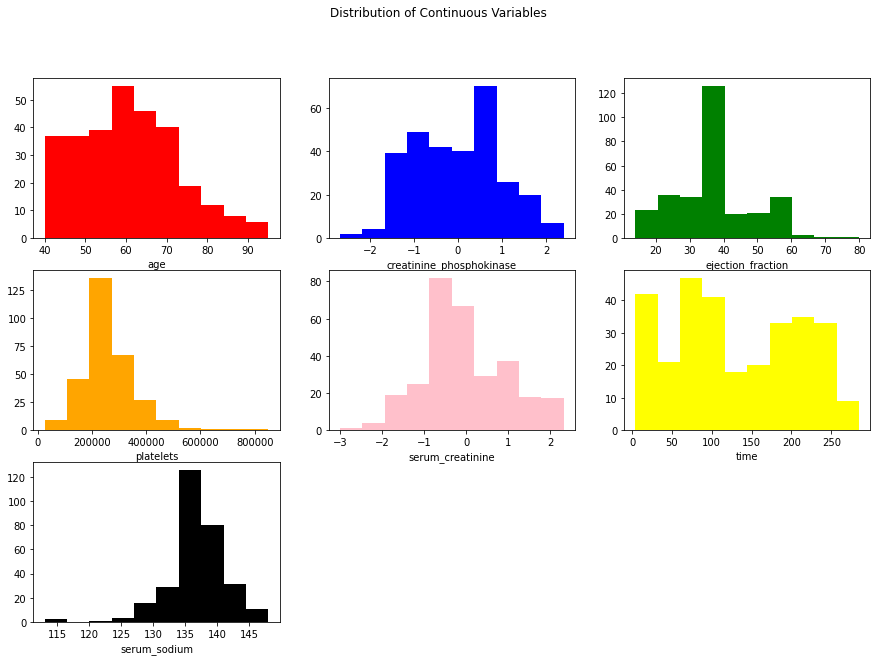

In [10]:
figure = plt.figure(figsize=(15, 10))
colors = ['red', 'blue', 'green', 'orange', 'pink', 'yellow', 'black']
plt.suptitle("Distribution of Continuous Variables")
for i in range(1, 8):
    plt.subplot(3,3,i)
    plt.hist(df[numeric[i-1]], color = colors[i-1])
    # plt.plot(df[numeric[i-1]])
    plt.xlabel(numeric[i-1])
    plt.plot()

**After doing the transformation we can now see that the data is distributed as per the Bell Curve so we can move forward**

### Scatter Plots:
Scatter plots to determaine if there is any significant relation between the Age of the patients and all the other parameters we have in our dataset.

[]

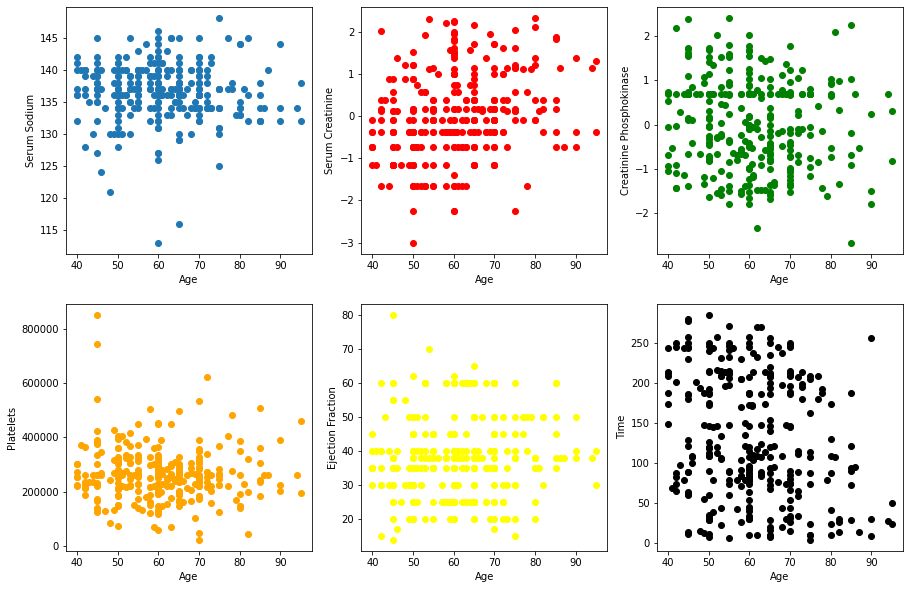

In [17]:
plt.figure(figsize=(15,10))

plt.subplot(2,3,1)
plt.scatter(x=df['age'], y=df['serum_sodium'])
plt.xlabel('Age')
plt.ylabel('Serum Sodium')
plt.plot()

plt.subplot(2,3,2)
plt.scatter(x=df['age'], y = df['serum_creatinine'], color='red')
plt.xlabel('Age')
plt.ylabel('Serum Creatinine')
plt.plot()

plt.subplot(2,3,3)
plt.scatter(x=df['age'], y = df['creatinine_phosphokinase'], color = 'green')
plt.xlabel('Age')
plt.ylabel('Creatinine Phosphokinase')
plt.plot()

plt.subplot(2,3,4)
plt.scatter(x=df['age'], y = df['platelets'], color = 'orange')
plt.xlabel('Age')
plt.ylabel('Platelets')
plt.plot()

plt.subplot(2,3,5)
plt.scatter(x=df['age'], y = df['ejection_fraction'], color = 'yellow')
plt.xlabel('Age')
plt.ylabel('Ejection Fraction')
plt.plot()

plt.subplot(2,3,6)
plt.scatter(x=df['age'], y = df['time'], color = 'black')
plt.xlabel('Age')
plt.ylabel('Time')
plt.plot()

**The scatter plots above do not show any significant trend between Age of the patient and the other quantities, the data is randomly distributed all over the plane.** 

### HeatMap:
- Using the heat map we will determine if there is any significant relation between any of the continuous variables and if any significant relation is found we will drop of othe two related quantities.

- In the heat map below  we can see that there is no significant relation between any of the continuous variables so we can move forward without droping any columns.

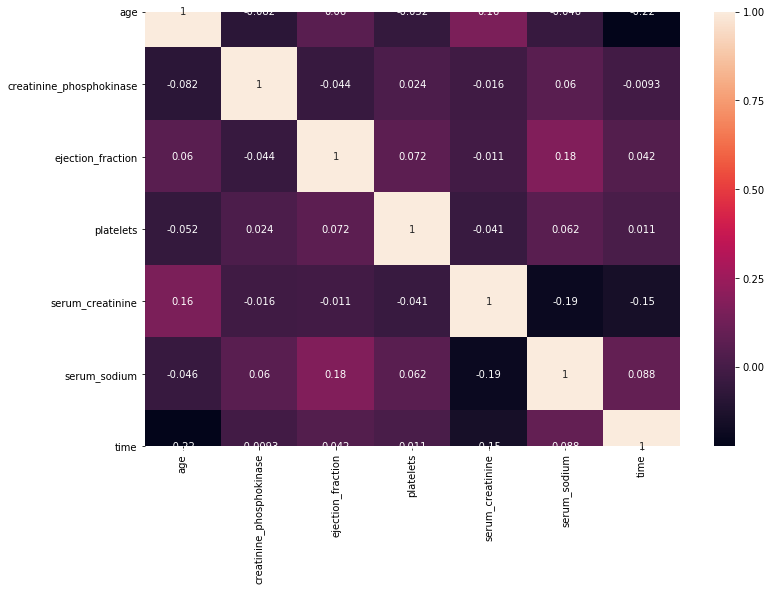

In [15]:
df_heatmap = df.drop(columns=['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT'])
fig = plt.figure(figsize=(12,8))
sns.heatmap(df_heatmap.corr(), annot = True)

In [17]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


## Relation between Categorical and Continuous Data & Relation between Categorical Data:

For this we will use the chi square test, t-test, p-test, annova test
chi sqaure test: categorical vs categorical
t-test: continuous & continuous vs categorical


In [10]:
from sklearn.feature_selection import chi2

categorical_data = ['anaemia',
                     'diabetes',
                     'high_blood_pressure',
                     'sex',
                     'smoking',
                     'DEATH_EVENT']
test_df = df.drop(columns=numeric)
test_df.head()


,anaemia,diabetes,high_blood_pressure,sex,smoking,DEATH_EVENT
0,0,0,1,1,0,1
1,0,0,0,1,0,1
2,0,0,0,1,1,1
3,1,0,0,1,0,1
4,1,1,0,0,0,1


## Chi2 Test:

### Hypothesis:
- Ho = The feature and Target variable have no relation
- Alternate Hypothesis = The feature and the Target variable are closely related.

We will calculate the p-value for each feature our threshold will be 0.05, if any p-vlaue is less than 0.05 we will reject our null hypothesis and accept the alternate hypothesis.

First we will perform the chi2 test for independent variables and the between the independent and target variable.

### Chi2 Test between Independent Variables:

In [11]:
# anaemia vs other independent features ('diaetes', 'high_blood_pressure', 'sex', 'smoking')

dict1 = dict()
independent = ('diabetes', 'high_blood_pressure', 'sex', 'smoking')
chi2_val, p_val = chi2(test_df.iloc[:, 1:5], test_df.iloc[:, 0])

itr = 0
for i in independent:
    string = f'anaemia vs {i}'
    dict1[string] = p_val[itr]
    itr += 1

# dict1

In [12]:
# smoking vs other independent features ('diaetes', 'high_blood_pressure', 'sex')

dict2 = dict()
independent = ('diaetes', 'high_blood_pressure', 'sex')
chi2_val, p_val = chi2(test_df.iloc[:, 1:4], test_df.iloc[:, 4])

itr = 0
for i in independent:
    string = f'smoking vs {i}'
    dict2[string] = p_val[itr]
    itr += 1

# dict2

In [13]:
# diabetes vs other independent features ('high_blood_pressure', 'sex')

dict3 = dict()
independent = ('high_blood_pressure', 'sex')
chi2_val, p_val = chi2(test_df.iloc[:, 2:4], test_df.iloc[:, 1])

itr = 0
for i in independent:
    string = f'diabetes vs {i}'
    dict3[string] = p_val[itr]
    itr += 1

# dict3

In [15]:
# high_blood_pressure vs sex

dict4 = dict()
independent = ['sex']
chi2_val, p_val = chi2(test_df.iloc[:, 3:4], test_df.iloc[:, 2])

itr = 0
for i in independent:
    string = f'high_blood_pressure vs {i}'
    dict4[string] = p_val[itr]

# dict4

In [16]:
# Summarizing the Results:

dict_names = [dict1, dict2, dict3, dict4]
for i in range(0, 4):
    dictionary = dict_names[i]
    for key, value in dictionary.items():
        print(f'{key}: {value}')

anaemia vs diabetes: 0.8666559347273115
anaemia vs high_blood_pressure: 0.594854992140792
anaemia vs sex: 0.3315020306255289
anaemia vs smoking: 0.1263525006678854
smoking vs diaetes: 0.05221575927284853
smoking vs high_blood_pressure: 0.43776694989237386
smoking vs sex: 4.899856713610256e-06
diabetes vs high_blood_pressure: 0.8592401113570308
diabetes vs sex: 0.10604103630413232
high_blood_pressure vs sex: 0.28372858577976934


### Chi2 Test between Independent Variables and Target Variables:

In [32]:
# independent features vs Target Variable

dict5 = dict()
independent = ('anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking')
chi2_val, p_val = chi2(test_df.iloc[:, 0:5], test_df.iloc[:, -1])

itr = 0
for i in independent:
    string = f'DEATH_EVENT vs {i}'
    dict5[string] = p_val[itr]
    itr += 1
    
dict5

{'DEATH_EVENT vs anaemia': 0.387556924759485,
 'DEATH_EVENT vs diabetes': 0.9795537403764981,
 'DEATH_EVENT vs high_blood_pressure': 0.2690589262568509,
 'DEATH_EVENT vs sex': 0.9647213115147079,
 'DEATH_EVENT vs smoking': 0.8572685693681174}

In [29]:
heat_plot = [[1,0.8666559347273115,0.594854992140792,0.3315020306255289,0.1263525006678854,0.387556924759485],
            [0.8666559347273115,1,0.8592401113570308,0.10604103630413232,0.05221575927284853,0.9795537403764981],
            [0.594854992140792,0.8592401113570308,1,0.28372858577976934,0.43776694989237386,0.2690589262568509],
            [0.3315020306255289,0.10604103630413232,0.28372858577976934,1,.0004899856713610,0.9647213115147079],
            [0.1263525006678854,0.05221575927284853,0.43776694989237386,.0004899856713610,1,0.8572685693681174],
            [0.387556924759485,0.9795537403764981,0.2690589262568509,0.9647213115147079,0.8572685693681174,1]]

categorical_data = ['anaemia',
                     'diabetes',
                     'high_bp',
                     'sex',
                     'smoking',
                     'DEATH_EVENT']

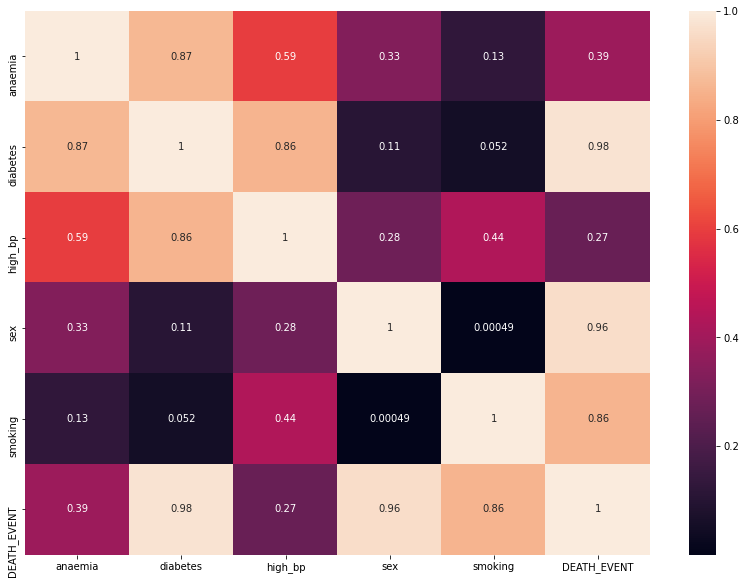

In [35]:
fig = plt.figure(figsize=(14, 10))
sns.heatmap(heat_plot, annot = True)
plt.xticks([i+0.5 for i in range(6)], categorical_data)
plt.yticks([i+0.5 for i in range(6)], categorical_data)
plt.show()

## Results of Chi2 Test:

- Ho = The varibles are not related (p_val > 0.05)
- H1 = The variables are relates (p_val < 0.05)

1. DEATH_EVENT our target variable shows no significant relation with any of the other variables.
2. SEX and SMOKING share a very strong relation this result was expected considering the earlier observations.
3. SMOKING and DIABETES also share a strong relation.

### Conclusion:

**None of the categorical variables share a strong relation with the target variable but there are some independent variable which are closely related so we will probably drop one of those variables to avoid a bias** 

In [36]:
df.drop(columns = ['sex', 'diabetes'], inplace = True)

In [37]:
X = df.iloc[:, 0:10].values
Y = df['DEATH_EVENT'].values

## Spliting Data into Train and Test Data:
- We will be splitting our data in ratio of 9:1 out of which 90% would be training data and 10% would be testing data. to do this we will use the **train_test_split module**.
- To evalute the performance of the models we will consider the mean square error and the **f1-score**. 
- We will also include the **GridSearchCV** for Hyper Parameter Tuning here 

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=6)

## Model Training Testing and Selection:

We will be using a blend of typical classification models and Ensemble based classification models to solve this problem.

Models that we will use:
1. Logistic Regression
2. Decision Tree
3. Random Forest
4. Bagging Classifier
5. GradientBoosting Classifier
6. XGBoost
7. XGBRFClassifier
8. Extra Trees Classifier
9. KNearestNeighbors

After training and testing the models we will aslo study the feature importance for the models and try hyper parameter tuning where ever possible.

**Out of all these models we will select the top 5 models based on the F1-Scores and the create a final Aggregator function which will make the final prediction**

## Logistic Regression:
Even after trying hyper paramenter tuning we were getting similar results so we decided not to use hyper parameter tuning here.

**Final Reults:**
  - Train Accuracy:  0.8215613382899628
  - Test Accuracy:  0.9
  - F1 score Test:  0.8571428571428572

In [46]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=0.01)
lr.fit(x_train, y_train)
predict = lr.predict(x_test)

print("Train Accuracy: ",lr.score(x_train, y_train))
print("Test Accuracy: ", lr.score(x_test, y_test))
print("F1 score Test: ", f1_score(predict, y_test))

Train Accuracy:  0.8215613382899628
Test Accuracy:  0.9
F1 score Test:  0.8571428571428572


## Decision Tree:

We got pretty good result using the decision tree it was found that the most important features according to the decision tree were:
1. Time
2. Serum Ceratinine
3. Ceratinine Phosphokinase

The parameter values suggested by hyper paratmeter tuning were the same as before.

**Final Reults:**
  - Train Accuracy:  1.0
  - Test Accuracy:  0.9666666666666667
  - F1 score Test:  0.9523809523809523

In [47]:
from sklearn.tree import DecisionTreeClassifier

dclf = DecisionTreeClassifier()
dclf.fit(x_train, y_train)
predict = dclf.predict(x_test)

print("Train Accuracy: ",dclf.score(x_train, y_train))
print("Test Accuracy: ", dclf.score(x_test, y_test))
print("F1 score Test: ", f1_score(predict, y_test))

Train Accuracy:  1.0
Test Accuracy:  0.9
F1 score Test:  0.8695652173913043


### Feature Importance Decision Tree Classifier:

<AxesSubplot:>

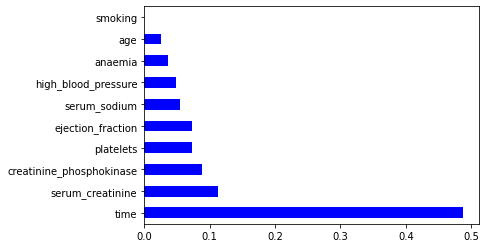

In [49]:
feature_imp = pd.Series(dclf.feature_importances_, index = list(df.columns)[:10])
feature_imp.nlargest(10).plot(kind = 'barh', cmap = 'winter')

### Hyper Parameter Tuning Decision Tree Classifier

In [26]:
dclf.get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'presort', 'random_state', 'splitter'])

In [55]:
grid ={
    'max_depth':[i for i in range(14,30)],
    'criterion':['gini', 'entropy']
}

clf = GridSearchCV(dclf, grid)
clf.fit(X, Y)
clf.best_params_

{'criterion': 'gini', 'max_depth': 16}

In [53]:
dclf = DecisionTreeClassifier(criterion='gini', 
                              max_depth= 16,
                            )
dclf.fit(x_train, y_train)
predict = dclf.predict(x_test)

print("Train Accuracy: ",dclf.score(x_train, y_train))
print("Test Accuracy: ", dclf.score(x_test, y_test))
print("F1 score Test: ", f1_score(predict, y_test))

Train Accuracy:  1.0
Test Accuracy:  0.9666666666666667
F1 score Test:  0.9523809523809523


### Decision Tree Visualization:

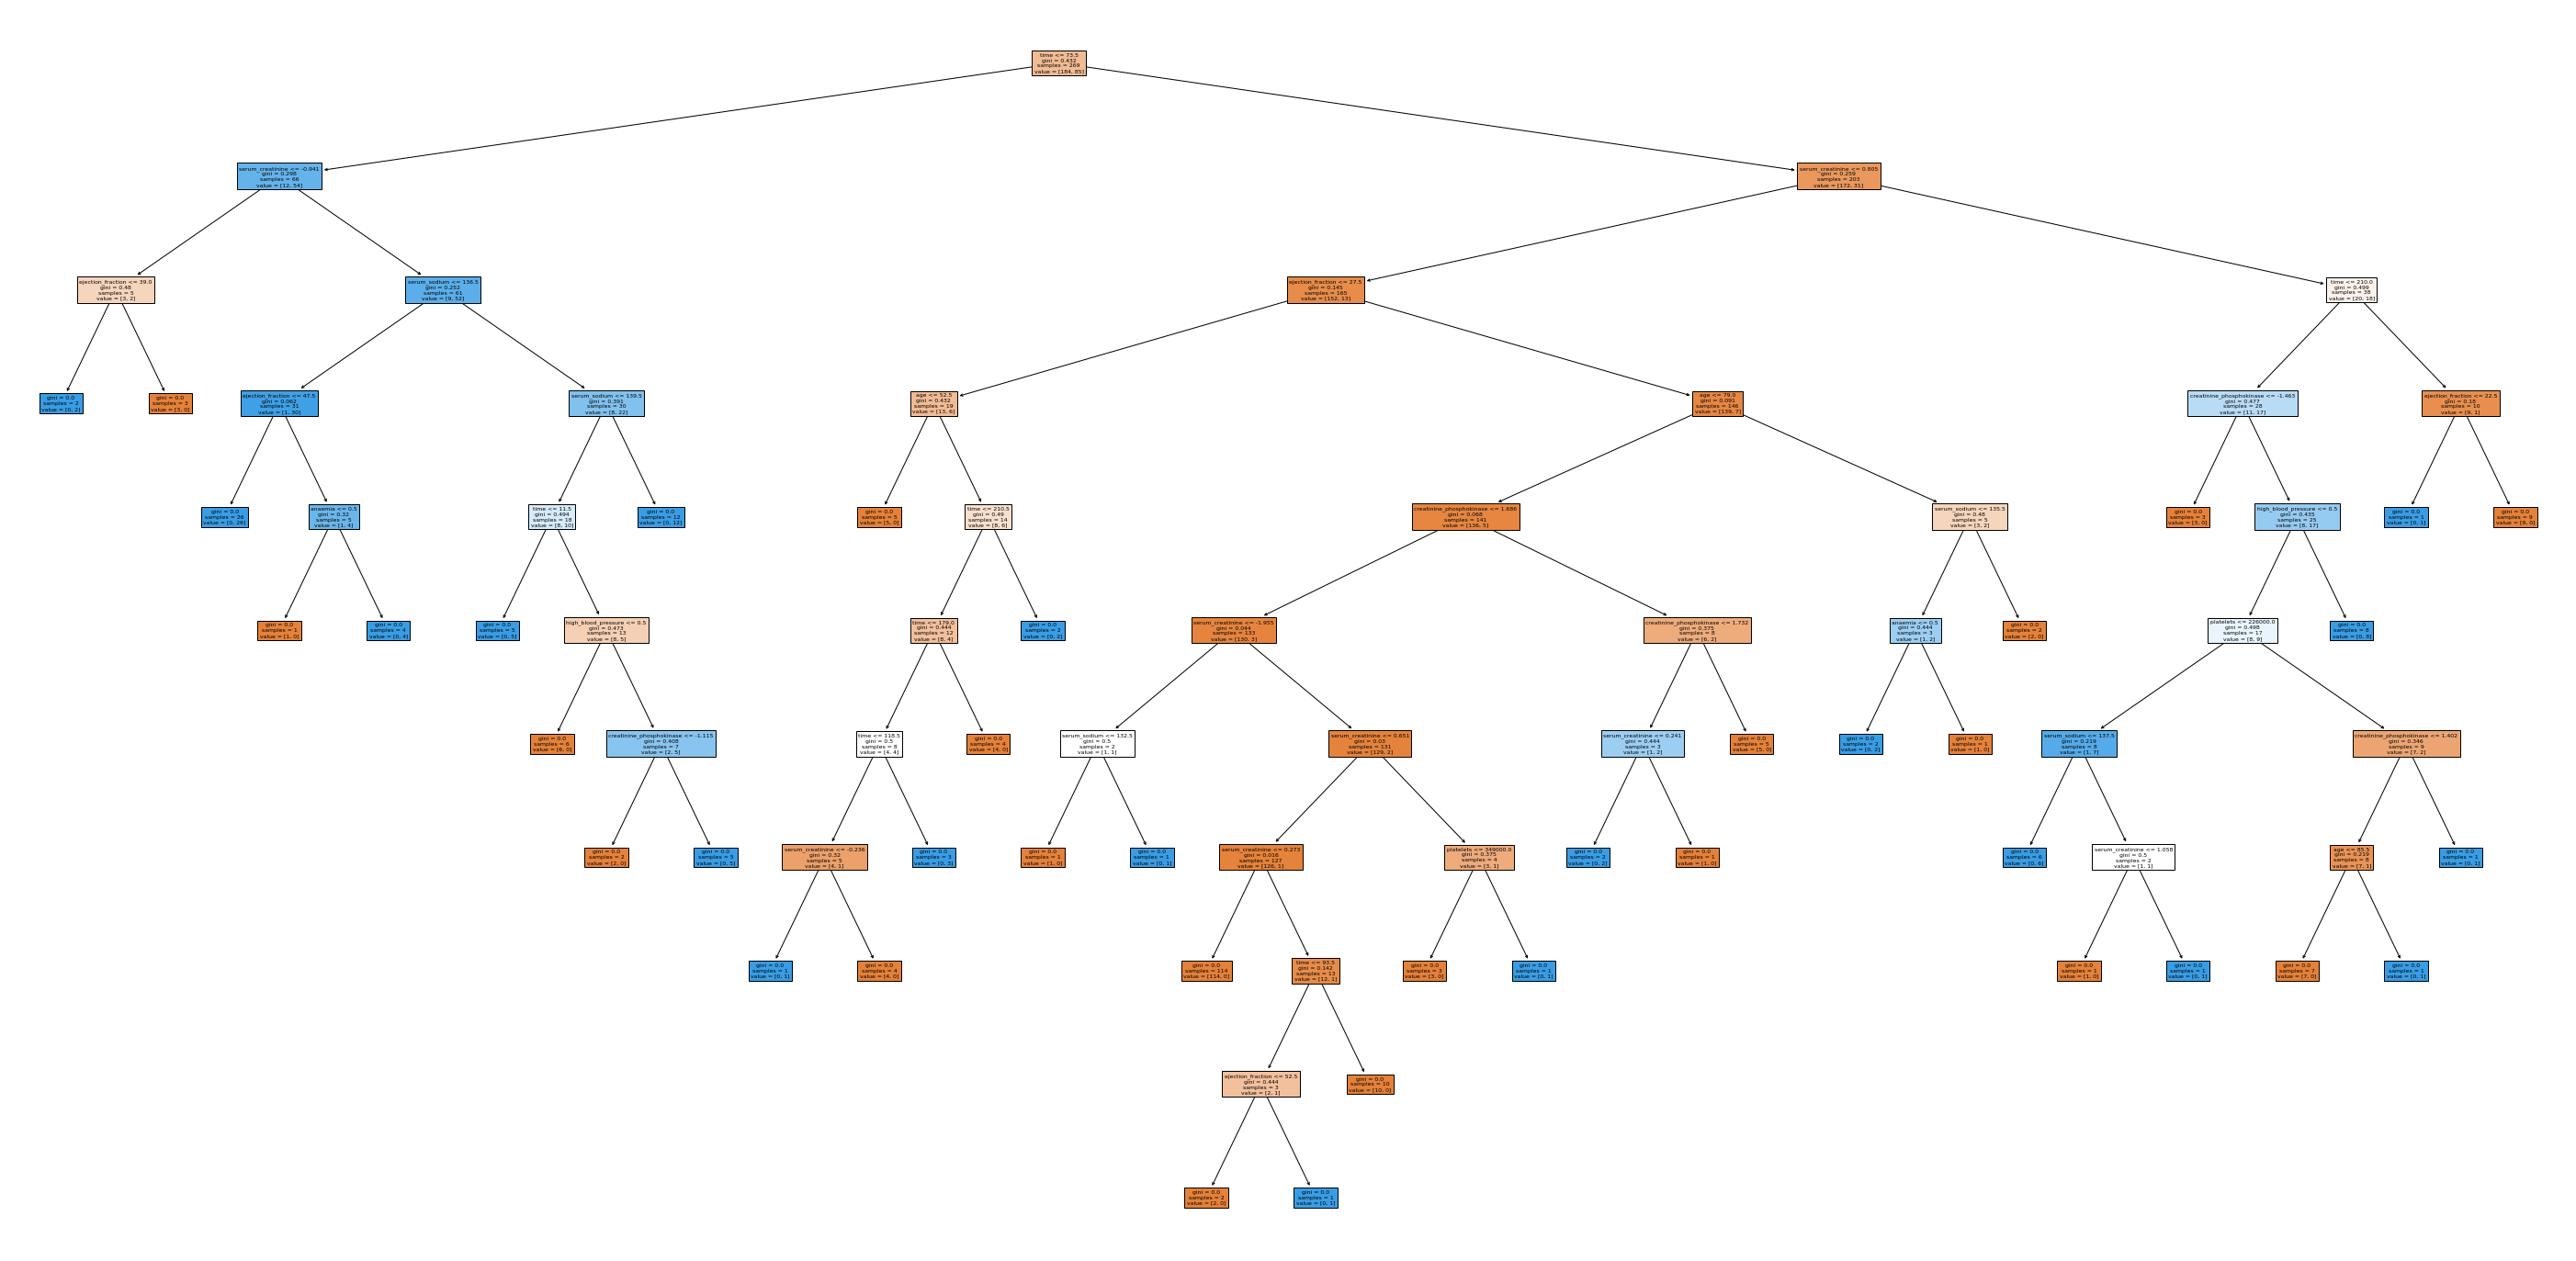

In [56]:
from sklearn import tree
figure = plt.figure(figsize=(50, 25))
t = tree.plot_tree(dclf, 
                   feature_names=list(df.columns)[:12],  
                   
                   filled=True)

## Random Forest:

<img src="RandomForest.ppm" alt="Bagging Classifier" style="height: 400px; width:400px;"/>

We got pretty good result using the Random Forest too, it was found that the most important features according to the Random Forest were:
1. Time
2. Serum Ceratinine
3. Ejection Fraction

The parameter values suggested by hyper paratmeter tuning were the same as before.

**Final Reults:**
  - Train Accuracy:  1.0
  - Test Accuracy:  0.9333333333333333
  - F1 score Test:  0.9090909090909091

In [57]:
from sklearn.ensemble import RandomForestClassifier

rclf = RandomForestClassifier()
rclf.fit(x_train, y_train)
predict = rclf.predict(x_test)
print("Train Accuracy: ",rclf.score(x_train, y_train))
print("Test Accuracy: ", rclf.score(x_test, y_test))
print("F1 score Test: ", f1_score(predict, y_test))

Train Accuracy:  1.0
Test Accuracy:  0.9
F1 score Test:  0.8695652173913043


### Feature Importance Random Forest Classifier:

<AxesSubplot:>

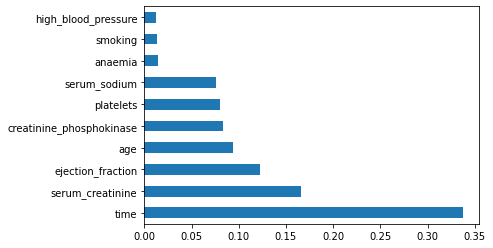

In [58]:
feature_imp = pd.Series(rclf.feature_importances_, index = list(df.columns)[:10])
feature_imp.nlargest(10).plot(kind = 'barh')

### Hyper Parameter Tuning Random Forest Classifier:

In [31]:
rclf.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [75]:
grid={
    'max_depth':[i for i in range(12, 30)],
    'n_estimators':[i for i in range(50, 150)],
    'criterion':['gini', 'entropy']
}

clf = GridSearchCV(rclf, grid)
clf.fit(X, Y)
clf.best_params_

{'criterion': 'gini', 'max_depth': 16, 'n_estimators': 82}

In [63]:
rclf = RandomForestClassifier(criterion = 'gini',
                              max_depth = 16,
                              n_estimators = 82)
rclf.fit(x_train, y_train)
predict = rclf.predict(x_test)

print("Train Accuracy: ",rclf.score(x_train, y_train))
print("Test Accuracy: ", rclf.score(x_test, y_test))
print("F1 score Test: ", f1_score(predict, y_test))

Train Accuracy:  1.0
Test Accuracy:  0.9333333333333333
F1 score Test:  0.9090909090909091


## Bagging Classifier:

Bagging = Bootstrapping + Aggregator
- **Bootstrapping**: Means that trains the model on random chunks of data, once a sample data is used the same data can be a part of multiple chunks.
- **Aggregator**:    Function which considers output of all the models and return the majority decision.

<img src="BaggingClassifier.png" alt="Bagging Classifier" style="height: 400px; width:400px;"/>

We got pretty good result using the Bagging Classifier too.

The parameter values suggested by hyper paratmeter tuning were the same as before.

**Final Reults:**
  - Train Accuracy:  0.992595167286245
  - Test Accuracy:  0.9333333333333333
  - F1 score Test:  0.9090909090909091

In [64]:
from sklearn.ensemble import BaggingClassifier

bclf = BaggingClassifier()
bclf.fit(x_train, y_train)
predict = bclf.predict(x_test)
print("Train Accuracy: ",bclf.score(x_train, y_train))
print("Test Accuracy: ", bclf.score(x_test, y_test))
print("F1 score Test: ", f1_score(predict, y_test))

Train Accuracy:  0.9776951672862454
Test Accuracy:  0.9
F1 score Test:  0.8571428571428572


### Hyper Parameter Tuning for Bagging Classifier:

In [95]:
bclf.get_params().keys()

dict_keys(['base_estimator', 'bootstrap', 'bootstrap_features', 'max_features', 'max_samples', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [82]:
grid = {
    'base_estimator':[DecisionTreeClassifier(), RandomForestClassifier(), XGBClassifier()],
    'n_estimators':[i for i in range(20, 50)]
}

clf = GridSearchCV(bclf, grid)
clf.fit(X, Y)
clf.best_params_

{'base_estimator': RandomForestClassifier(), 'n_estimators': 34}

In [71]:
bclf = BaggingClassifier(base_estimator = RandomForestClassifier(),
                         n_estimators = 34)
bclf.fit(x_train, y_train)
predict = bclf.predict(x_test)

print("Train Accuracy: ",bclf.score(x_train, y_train))
print("Test Accuracy: ", bclf.score(x_test, y_test))
print("F1 score Test: ", f1_score(predict, y_test))

Train Accuracy:  0.9776951672862454
Test Accuracy:  0.9
F1 score Test:  0.8695652173913043


## Gradient Boosting:

Gradient Boosting is a ensemble earning method in which the residual or loss of the previously misclassified samples is passed on to the next model in order to optimize the results.

For Example if our model will first get trained on some data during this a Loss function there will be optimized but will be some misclassified samples these residual values will be passed on to the model in the next iteration and the model will try to minimize the loss.

<img src="GradientBoosting.jfif" alt="Bagging Classifier" style="height: 300px; width:400px;"/>

We got a good result using the Gradient Boosting too, it was found that the most important features according to the GradientBoostingClassifier were:
1. Time
2. Serum Ceratinine
3. Ejection Fraction

**Final Reults:**
  - Train Accuracy:  1.0
  - Test Accuracy:  0.8666666666666667
  - F1 score Test:  0.8181818181818182

In [72]:
from sklearn.ensemble import GradientBoostingClassifier

gclf = GradientBoostingClassifier()
gclf.fit(x_train, y_train)
predict = gclf.predict(x_test)

print("Train Accuracy: ",gclf.score(x_train, y_train))
print("Test Accuracy: ", gclf.score(x_test, y_test))
print("F1 score Test: ", f1_score(predict, y_test))

Train Accuracy:  0.9962825278810409
Test Accuracy:  0.9
F1 score Test:  0.8695652173913043


### Feature Importance of GradientBoosting Classifier:

<AxesSubplot:>

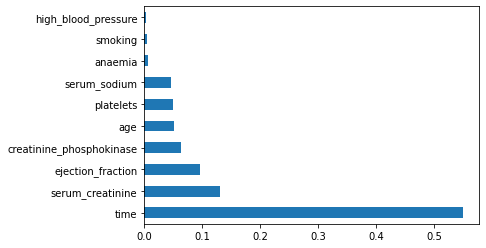

In [73]:
feature_imp = pd.Series(gclf.feature_importances_, index = list(df.columns)[:10])
feature_imp.nlargest(10).plot(kind = 'barh')

## XGBoost Classifier:

XGBoost Classifier is very similar to GradientBoosting Classifier the only difference between the Gradient and Extreme Gradient Boosting is the Loss Function.
In XGBoost the Loss Function is a Double Derivative function where as in Gradient boosting a single derivative loss function is used.

We got pretty good result using the XGBoost too, it was found that the most important features according to the XGBoost were:
1. Time
2. Serum Ceratinine
3. Ejection Fraction

**Final Reults:**
  - Train Accuracy: 1.0
  - Test Accuracy:  0.9333333333333333
  - F1 score Test:  0.9090909090909091

In [74]:
from xgboost import XGBClassifier

xclf = XGBClassifier()
xclf.fit(x_train, y_train)
predict = xclf.predict(x_test)

print("Train Accuracy: ",xclf.score(x_train, y_train))
print("Test Accuracy: ", xclf.score(x_test, y_test))
print("F1 score Test: ", f1_score(predict, y_test))

Train Accuracy:  1.0
Test Accuracy:  0.9666666666666667
F1 score Test:  0.9523809523809523


### Feature Importance of XGBoost Classifier:

<AxesSubplot:>

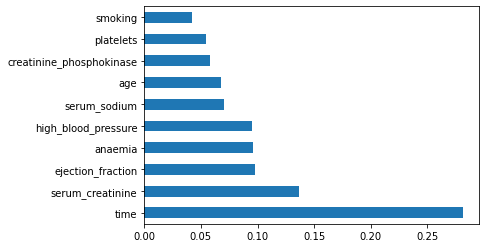

In [76]:
feature_imp = pd.Series(xclf.feature_importances_, index = list(df.columns)[:10])
feature_imp.nlargest(10).plot(kind = 'barh')

In [41]:
xclf.get_params().keys()

dict_keys(['objective', 'base_score', 'booster', 'colsample_bylevel', 'colsample_bynode', 'colsample_bytree', 'gamma', 'gpu_id', 'importance_type', 'interaction_constraints', 'learning_rate', 'max_delta_step', 'max_depth', 'min_child_weight', 'missing', 'monotone_constraints', 'n_estimators', 'n_jobs', 'num_parallel_tree', 'random_state', 'reg_alpha', 'reg_lambda', 'scale_pos_weight', 'subsample', 'tree_method', 'validate_parameters', 'verbosity'])

## XGBRFClassifier:
It is similar to a Random Forest Classifier the only difference her ebeing that the Base Estimator is a XGBoost Classifier
instead of a Decision Tree.
So XGBRF is a Forest of XGBoost Classifiers.

We got a good result using XGBRFClassifier, it was found that the most important features according to the XGBRFClassifier 
were:
1. Time
2. Serum Ceratinine
3. Ejection Fraction

**Final Reults:**
  - Train Accuracy: 0.9442379182156134
  - Test Accuracy:  0.9333333333333333
  - F1 score Test:  0.9090909090909091


In [77]:
from xgboost import XGBRFClassifier

xrclf = XGBRFClassifier()
xrclf.fit(x_train, y_train)
predict = xrclf.predict(x_test)

print("Train Accuracy: ",xrclf.score(x_train, y_train))
print("Test Accuracy: ", xrclf.score(x_test, y_test))
print("F1 score Test: ", f1_score(predict, y_test))

Train Accuracy:  0.9442379182156134
Test Accuracy:  0.9333333333333333
F1 score Test:  0.9090909090909091


### Feature Importance of XGBRFClassifier:

<AxesSubplot:>

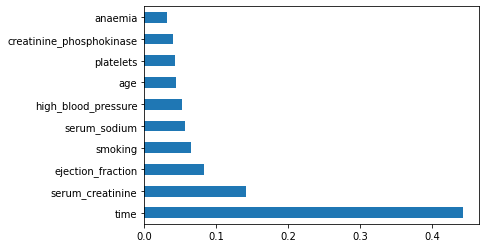

In [78]:
feature_imp = pd.Series(xrclf.feature_importances_, index = list(df.columns)[:10])
feature_imp.nlargest(10).plot(kind = 'barh')

## Extra Trees Classifier:

Extra Trees Classifier is a type of ensemble learning technique which aggregates the results of multiple de-correlated 
decision trees collected in a “forest” to output it’s classification result. In concept, it is very similar to a Random Forest Classifier and only differs from it in the manner of construction of the decision trees in the forest.

Each Decision Tree in the Extra Trees Forest is constructed from the original training sample. Then, at each test node, 
Each tree is provided with a random sample of k features from the feature-set from which each decision tree must select the 
best feature to split the data based on some mathematical criteria (typically the Gini Index). 
This random sample of features leads to the creation of multiple de-correlated decision trees.

A satisfactory result was obtained using Extra Tree Classifier, it was also found that the most important features in Extra Tree Classifier were:
1. Time
2. Ejection Fraction
3. Serum Ceratinine

**Final Reults:**
  - Train Accuracy: 1.0
  - Test Accuracy:  0.9
  - F1 score Test:  0.8421052631578948

In [79]:
from sklearn.ensemble import ExtraTreesClassifier

eclf = ExtraTreesClassifier()
eclf.fit(x_train, y_train)
predict = eclf.predict(x_test)

print("Train Accuracy: ",eclf.score(x_train, y_train))
print("Test Accuracy: ", eclf.score(x_test, y_test))
print("F1 score Test: ", f1_score(predict, y_test))

Train Accuracy:  1.0
Test Accuracy:  0.9
F1 score Test:  0.8571428571428572


### Feature Importance of ExtraTree Classifier:

<AxesSubplot:>

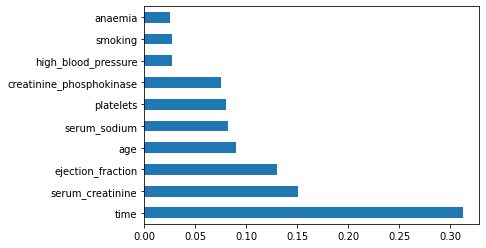

In [80]:
feature_imp = pd.Series(eclf.feature_importances_, index = list(df.columns)[:10])
feature_imp.nlargest(10).plot(kind = 'barh')

In [81]:
from sklearn.feature_selection import SelectFromModel

model = SelectFromModel(eclf, prefit = True)
X_new_train = model.transform(x_train)
X_new_test = model.transform(x_test)

In [86]:
eclf = ExtraTreesClassifier(n_estimators = 110, max_depth=14)
eclf.fit(X_new_train, y_train)
predict = eclf.predict(X_new_test)

print("Train Accuracy: ",eclf.score(X_new_train, y_train))
print("Test Accuracy: ", eclf.score(X_new_test, y_test))
print("F1 score Test: ", f1_score(predict, y_test))

Train Accuracy:  1.0
Test Accuracy:  0.9
F1 score Test:  0.8695652173913043


## K-Nearest-Neighbors:

KNN uses the basic principle of eucledian distance to find group that a sample belongs to.

KNN gave a very poor result in our testing, the assumed reason for this was the less number of samples and randomized distribution of data.

We also tried tuning the model using graphical method but it did not yield any meaningful result.

**Final Reults:**
  - Train Accuracy: 0.7620817843866171
  - Test Accuracy:  0.6333333333333333
  - F1 score Test:  0.3529411764705882

In [87]:
from sklearn.neighbors import KNeighborsClassifier

kclf = KNeighborsClassifier()
kclf.fit(x_train, y_train)
predict = kclf.predict(x_test)
print("Train Accuracy: ",kclf.score(x_train, y_train))
print("Test Accuracy: ", kclf.score(x_test, y_test))
print("F1 score Test: ", f1_score(predict, y_test))

Train Accuracy:  0.7620817843866171
Test Accuracy:  0.6333333333333333
F1 score Test:  0.3529411764705882


**We can see that KNN is performing very poorly when the number of varibles are more so now we will select less variables for KNN. For feature selection we will select the 3 best features from the graphs we plotted before**

- Time
- Serum Ceratinine
- Ejection Fraction

In [95]:
new_df = df.drop(columns=['age', 'anaemia', 'creatinine_phosphokinase', 
       'high_blood_pressure', 'platelets', 'serum_sodium',
       'smoking'])
new_df.head()

,ejection_fraction,serum_creatinine,time,DEATH_EVENT
0,20,1.212227,4,1
1,38,-0.087641,6,1
2,20,0.381817,7,1
3,20,1.212227,7,1
4,20,1.715066,8,1


In [96]:
X_new = new_df.iloc[:, 0:3].values
Y_new = new_df.iloc[:, -1].values

In [97]:
x_new_train, x_new_test, y_new_train, y_new_test = train_test_split(X_new, Y_new, test_size = 0.2, random_state = 0)

3


Text(0.5, 0, 'N-5')

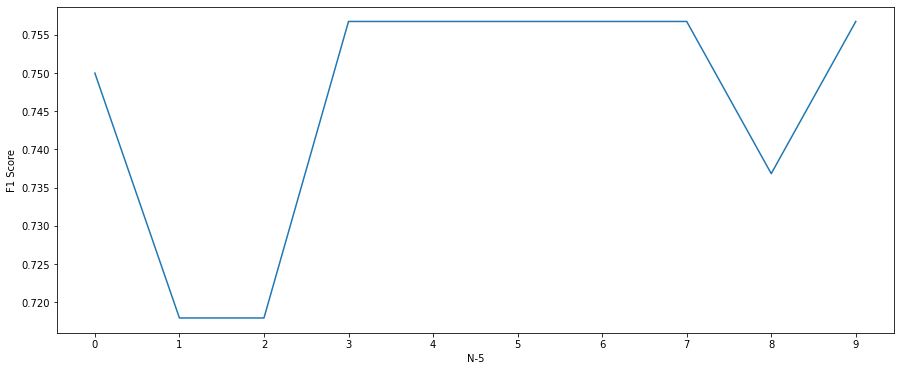

In [111]:
scores = []
for i in range(5, 15):
    kclf = KNeighborsClassifier(n_neighbors=i)
    kclf.fit(x_new_train, y_new_train)
    predict = kclf.predict(x_new_test)
    score = f1_score(predict, y_new_test)
    scores.append(score)

print(scores.index(max(scores)))
plt.figure(figsize=(15,6))
plt.plot(scores)
# plt.plot([max(scores) for i in range(5,15)], color='red')
plt.xticks([i for i in range(0, 10)])
plt.ylabel("F1 Score")
plt.xlabel("N-5")


In [112]:
kclf = KNeighborsClassifier(n_neighbors=11)
kclf.fit(x_new_train, y_new_train)
predict = kclf.predict(x_new_test)

print("Train Accuracy: ",kclf.score(x_new_train, y_new_train))
print("Test Accuracy: ", kclf.score(x_new_test, y_new_test))
print("F1 score Test: ", f1_score(predict, y_new_test))

Train Accuracy:  0.8619246861924686
Test Accuracy:  0.85
F1 score Test:  0.7567567567567568


## Visualization of Results:

In [113]:
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Bagging Classifier', 'Gradient Boosting', "XgBoost",
              'XGBRFBoost', 'Extra Trees', 'KNN']
scores = [0.9, 0.9666666666667, 0.9333333, 0.9333333, 0.86666667, 0.9666666666666667, 0.9333333, 0.9, 0.85]
f1_scores = [0.8571428571428572, 0.9523809523809523, 0.9090909090909091, 0.9090909090909091, 0.8181818181818182, 0.9523809523809523, 0.9090909090909091, 0.8695652173913043, 0.7567567567567568]

In [114]:
print(scores, f1_scores)

[0.9, 0.9666666666667, 0.9333333, 0.9333333, 0.86666667, 0.9666666666666667, 0.9333333, 0.9, 0.85] [0.8571428571428572, 0.9523809523809523, 0.9090909090909091, 0.9090909090909091, 0.8181818181818182, 0.9523809523809523, 0.9090909090909091, 0.8695652173913043, 0.7567567567567568]


In [115]:
import plotly.graph_objects as go

fig = go.Figure(go.Bar(x=model_names, y = f1_scores,
                       marker = dict(color = scores, colorscale = 'Jet')))
fig.update_layout(title = 'F1 Scores of Different Models')
fig.show()

In [116]:
fig = go.Figure(go.Bar(x=model_names, y = scores, name = 'MSE of Different Models',
                       marker = dict(color = scores, colorscale = 'Bluered')))
fig.update_layout(title = 'Mean Accuracy of Different Models')
fig.show()

## Aggregator Function:

Using the information shown above we get that the top 5 Models for our prediction are:
1. Decision Tree
2. Random Forest
3. Bagging Classifier
4. XGBoost Classifier
5. XGBRFBoost Classifier

**The Aggregator function will take in input from user and feed it to the 5 models in our function the prediction of these 5 models will be recorded. The answer which has the majority among all the predictions will be outputed to the user.**

In [15]:
def Aggregator(data, dclf, rclf, bclf, xclf, xrclf):
    # Check if Input data is valid 
    if len(data) == 12:
        #convert data into a 2D array
        data = list(data)
        
        # make predictions using all five models
        pred1 = dclf.predict(data)
        pred2 = rclf.predict(data)
        pred3 = bclf.predict(data)
        pred4 = xclf.predict(data)
        pred5 = xrclf.predict(data)
        
        # find out the majority decision
        pred = [pred1, pred2, pred3, pred4, pred5]
        risk = pred.count(1)
        healthy = pred.count(0)
        
        # return 0/1 depending on result
        if risk > heathy:
            return 1
        else:
            return 0
    # if data is invalid return -1
    else:
        return -1